In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

path = os.path.join('Cancer_Data.csv')

dataset = pd.read_csv(path)

dataset = dataset.drop('id', axis='columns')
x = dataset.iloc[:, 1:31].values
y = dataset.iloc[:, 0].values.reshape(-1, 1)

le = LabelEncoder()
y = le.fit_transform(y)

ros = RandomOverSampler(random_state=0)

# Resampling the data
x_resampled, y_resampled = ros.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=0)

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(f'{(accuracy_score(y_test, y_pred) * 100):.2f}% is the accuracy')
print(cm)


96.28% is the accuracy
[[114   5]
 [  3  93]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
joblib.dump(classifier, 'classifier.pk1')

['classifier.pk1']

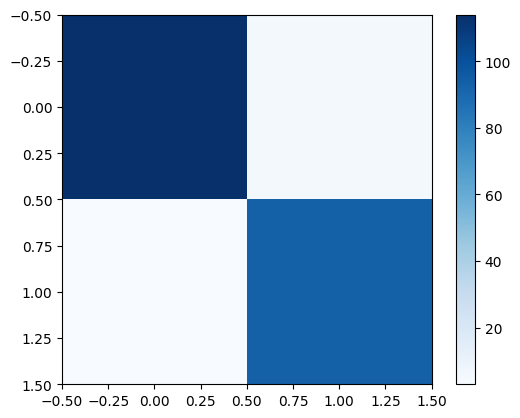

In [15]:
plt.imshow(cm, cmap = 'Blues')
plt.colorbar()
plt.show()